# Project Employee Attrition Prediction

# I. Introduction

### Business Problem statement
Nowadays, <b>attrition</b> is crucial in business. It is the most serious issue that has been brought to the attention of the organizations as a whole. Being aware that the company is losing key talents and expertise. Managers and HR administrators are very interested in lowering employee turnover within the business in such a manner that it will contribute to the firm's maximum performance and success since employees are the most valuable assets of a company. 

### Importance
High attrition is a matter of concern for a corporation since it costs the company time and money. The corporation makes a loss on the amount it paid to recruit and choose these personnel, as well as  train them for their roles. The corporation may also have to pay more money to fill the positions left vacant by these individuals. As a result, it is vital for firm to maintain track of the attrition rate, which reduces the employment base.

### Benefits of the Solution
Reducing attrition rate will benefit the company beacuse recruiting and training of new hires is costly. Companies that do not prioritise employee retention pay a high price. Those that spend in boosting staff retention and mitigating turnover risks, on the other hand, receive huge dividends. They claim increased revenue, increased productivity and job quality, and increased staff morale.

### Formulating an approach
- As our Employee attrition problem is categorical meaning whether an employee will leave the company or not so our problem is best framed as binary classification.
- We will predict whether an employee is likely to leave the company or not(binary classification).
- Our dataset consists of 1470 examples and no missing values existed.
- Each row in dataset represents a single piece of data for which a single prediction is created.
- We are applying the labels {1, 0} to each observation.

### Classification or Regression
Whether an employee will stay or quit a firm, his or her response is simply binary, i.e. "YES" or "NO." As a result, we can see our dependent variable, Employee Attrition is only a categorical variable. We cannot utilise linear regression with a dependent categorical variable; So this problem is best framed as **"Binary Classification"**.

# 2. Building Machine Learning Pipeline

## Import necessary libraries

In [74]:
# Import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## Data Exploration

Exploratory Data Analytical is a preliminary analysis method that uses descriptive statistics and visualisation to describe data properties such as pattern, trends, outliers, and hypothesis testing.

### Dataset

The dataset is downloaded from <a href="kaggle.com">Kaggle.com</a>, It is a fictitious dataset generated by IBM data scientists. It's made up since it's unusual that a corporation would share accurate data about their employees in order to preserve their personal information. However, the project will incorporate techniques that are adaptive and useful for analysing a real-world dataset.

### Reading data into Pandas Dataframe

In [10]:
df = pd.read_csv("../../datasets/Attrition_DataSet.csv")
print("Data read into dataframe!")

Data read into dataframe!


### Showing first few rows

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Dimensions of the dataframe

In [12]:
df.shape

(1470, 35)

### Statistical Summary

In pandas, the describe() method is useful for obtaining different summary statistics. This function returns the data's count, mean, standard deviation, minimum and maximum values, and quantiles.

In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Checking attribute names and datatypes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset has 1470 samples, and 35 attributes out of which 26 attributes are float64 type and 9 attributes are object type.

In the presented dataset, there are two sorts of employees: those who stayed with the firm and those who departed. As a result, you may divide data into two groups and compare their properties. Using the groupby() and mean() functions, you may calculate the average of both groups.

In [15]:
left = df.groupby("Attrition")
left.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Employees who left the firm had a lower level of satisfaction, a lower rate of advancement, a lower compensation, and worked more hours than those who stayed.

### Employees Left

Let's see how many staff remained.The bar graph is appropriate for displaying discrete variable counts.

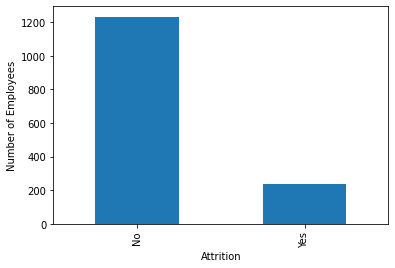

In [16]:
df["Attrition"].value_counts().plot.bar()
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.show()

In [17]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [18]:
# Percentage of Yes and No
df["Attrition"].value_counts(normalize=True) * 100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

As you can see, around 237 people were left out of a total of 1470, with 1233 remaining. The number of employees who have left the company accounts for 16.12 percent of the overall workforce.

### Time Spent with the Company

Similarly, we are creating a bar graph to tally the number of employees based on their level of experience.

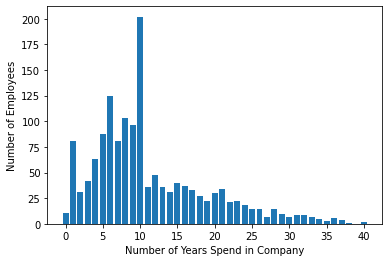

In [19]:
df_spent = df.groupby("TotalWorkingYears").count()
plt.bar(df_spent.index.values, df_spent["JobSatisfaction"])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

The majority of employees have 5-10 years of experience. 

### Age and Attrition relation

<AxesSubplot:xlabel='count', ylabel='Age'>

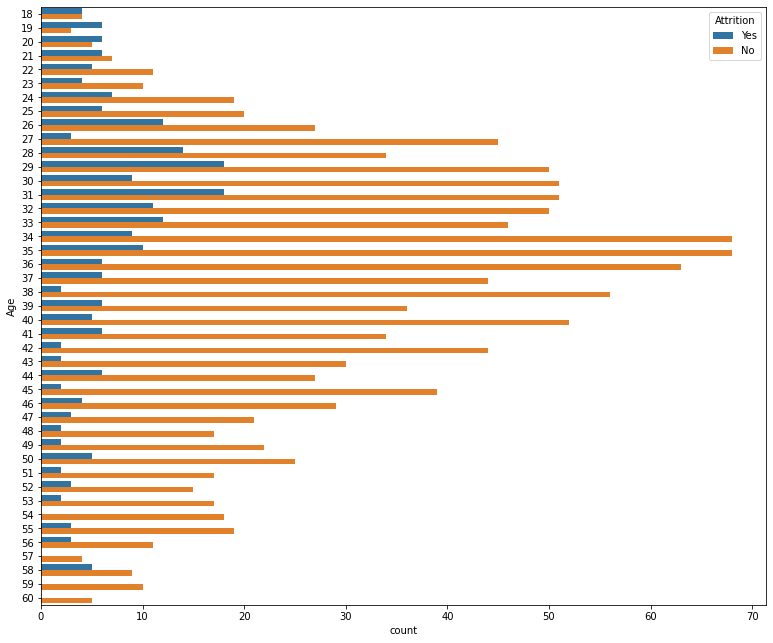

In [20]:
plt.figure(figsize=(13,11))
sns.countplot(y="Age", hue="Attrition", data=df)

According to the above visualization, employees between the age of 25-35 have a higher rate of attrition.

### Departments and Attrition relation

<AxesSubplot:xlabel='Department', ylabel='count'>

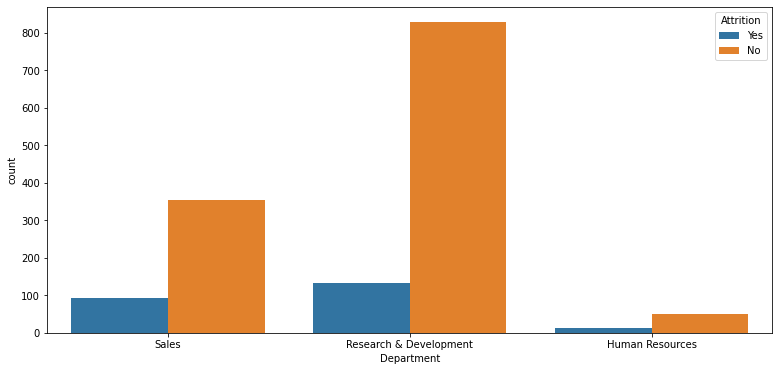

In [21]:
plt.figure(figsize=(13,6))
sns.countplot(x="Department", hue="Attrition", data=df)

In other departments, there is the similar pattern of churnout and non-churnout personnel.

### Education and Attrition relation

<AxesSubplot:xlabel='Education', ylabel='count'>

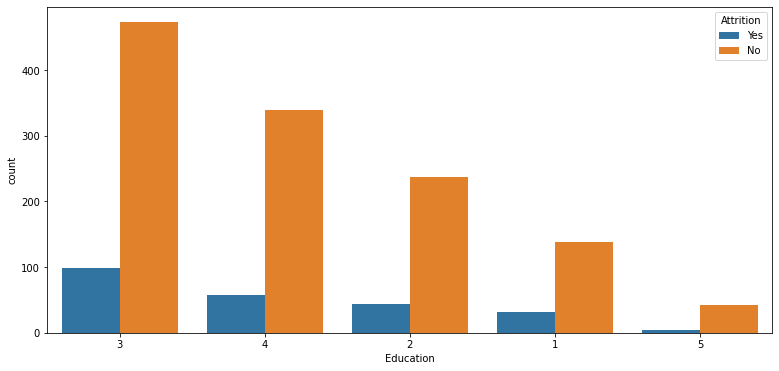

In [22]:
plt.figure(figsize=(13,6))
sns.countplot(x="Education", hue="Attrition", data=df, order = df["Education"].value_counts().index)

Almost same trend across all levels of education. Bachelors and Masters degree holders have a high incidence of attrition.

### Gender and Attrition relation


<AxesSubplot:xlabel='Gender', ylabel='count'>

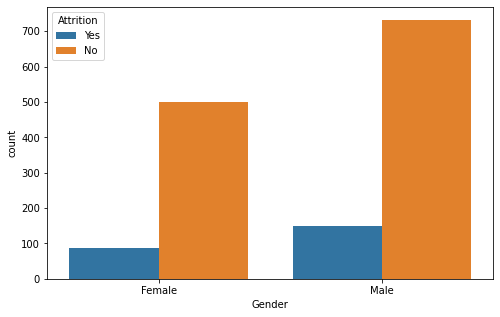

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x="Gender", hue="Attrition", data=df)

Males and females have the same pattern of attrition.

### Distance from home and attrition relation

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

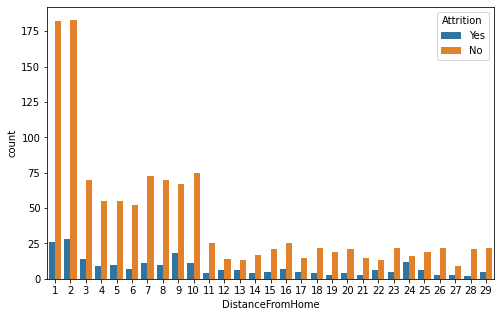

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x="DistanceFromHome", hue="Attrition", data=df)

Employees that commute a greater distance to work appear to contribute significantly to turnover. This is most likely the cause of attrition.

### Over Time and Attrition relation

Text(0.5, 1.0, 'No. of Attritions Reported by Over Time')

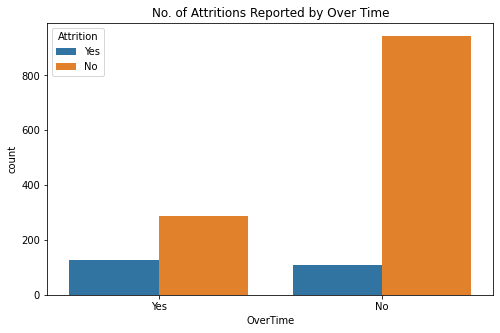

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("No. of Attritions Reported by Over Time")

In [26]:
df[(df["Attrition"] == 1)].groupby(["OverTime"]).size() / df.groupby(["OverTime"]).size()

OverTime
No    NaN
Yes   NaN
dtype: float64

Around 31% employees have attrited due to overtime, implying that it is a factor that needs to be considered for employee attrition.

### Job Role and Attrition relation

<AxesSubplot:xlabel='JobRole', ylabel='count'>

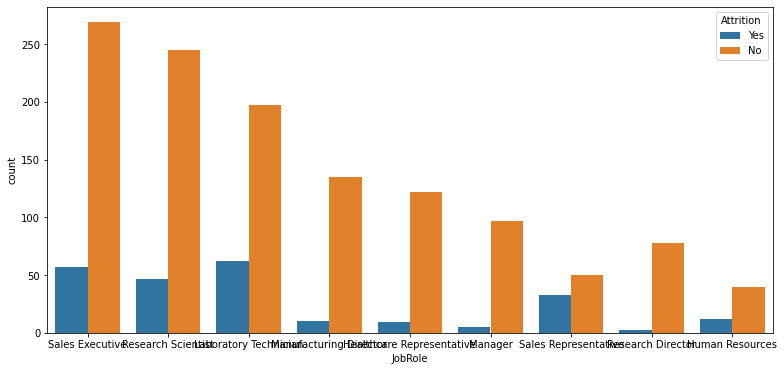

In [27]:
plt.figure(figsize=(13,6))
sns.countplot(x="JobRole", hue="Attrition", data=df, order = df["JobRole"].value_counts().index)

In [28]:
df[(df["Attrition"] == 1)].groupby(["JobRole"]).size() / df.groupby(["JobRole"]).size()

JobRole
Healthcare Representative   NaN
Human Resources             NaN
Laboratory Technician       NaN
Manager                     NaN
Manufacturing Director      NaN
Research Director           NaN
Research Scientist          NaN
Sales Executive             NaN
Sales Representative        NaN
dtype: float64

Almost 40% of attrited employees are Sales Representative followed by Laboratory Technition, Sales Executive, and Research Scientist are the occupational roles with the highest turnover rates.

### Look for columns that have a single, distinct category

In [29]:
df.nunique().sort_values(ascending=True).reset_index(name= "Unique Value count")

,index,Unique Value count
0,Over18,1
1,StandardHours,1
2,EmployeeCount,1
3,Gender,2
4,Attrition,2
5,PerformanceRating,2
6,OverTime,2
7,MaritalStatus,3
8,Department,3
9,BusinessTravel,3


We can see from the result that the columns "EmployeeCount," "Over18," and "StandardHours" each have a single unique value. As a result, it has no bearing on decision making.

## Data Preprocessing and Feature Engineering

Many machine learning methods demand numerical input data, therefore category columns must be represented numerically.

Map each value to a number to encode this data. For example, the value of the Salary column can be expressed as low:0, medium:1, and high:2.

This is referred to as label encoding.

### Determine which feature columns include object type categories

In [30]:
cat_df = df.select_dtypes(include= ["object"])
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

### Convert Object type columns into numeric type

In [31]:
# Create LabelEncoder
le = preprocessing.LabelEncoder()

# Convert categorical data into numeric
df["Attrition"] = le.fit_transform(df["Attrition"])
df["BusinessTravel"] = le.fit_transform(df["BusinessTravel"])
df["Department"] = le.fit_transform(df["Department"])
df["EducationField"] = le.fit_transform(df["EducationField"])
df["Gender"] = le.fit_transform(df["Gender"])
df["JobRole"] = le.fit_transform(df["JobRole"])
df["MaritalStatus"] = le.fit_transform(df["MaritalStatus"])
df["Over18"] = le.fit_transform(df["Over18"])
df["OverTime"] = le.fit_transform(df["OverTime"])

### Feature Selection

We detected three columns in the EDA stage that have single unique values, and we may eliminate these columns because they have no influence on decision making.

In [32]:
df = df.drop(columns=["EmployeeCount", "Over18","StandardHours"])

#### Determine Highly correlated Features

In [33]:
df_corr = df.corr()
df_corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


<AxesSubplot:>

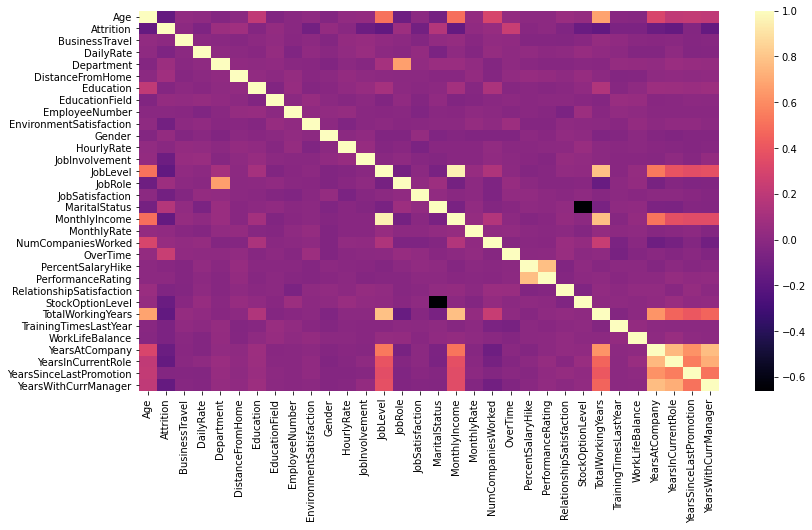

In [34]:
plt.figure(figsize=(13,7))
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, cmap = 'magma')

In [35]:
upper_tri = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
tobe_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
tobe_drop

['MonthlyIncome']

In [36]:
df = df.drop(columns=["MonthlyIncome"])

In [37]:
df.shape

(1470, 31)

We are dropping the "MonthlyIncome" feature due to its high correlation which will lead to multicollinearity conundrum.

### Split Train Set and Test Set

A effective technique for understanding model performance is to divide the dataset into a training set and a test set.

Let's partition the dataset using the train_test_split() method. You must supply three parameters: features, target, and test_set size. You may also use random state to choose records at random.

#### Creating two new datasets for target variable and independent variable

In [38]:
df_y = df["Attrition"]
df_x = df.drop(["Attrition"], axis=1)

#### Dividing data into train and test

In [39]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state = 105)

In [40]:
# Shapes of divided data
print("x_train: {}\nX_test: {}\nY_train: {}\nY_test: {}".format(df_x_train.shape, df_x_test.shape, df_y_train.shape, df_y_test.shape))

x_train: (1029, 30)
X_test: (441, 30)
Y_train: (1029,)
Y_test: (441,)


##  Model Selection and Hyperparameter Tuning  

Model selection is a critical step in the construction of a data science model pipeline. Following feature engineering, the data scientist must select the model with the optimal collection of hyperparameters for the training dataset. Several Auto-ML packages automate the model selection component.

Grid Search is a cross-validation approach for fine-tuning machine learning model hyperparameters. To choose the resilient model from a set of ML models, each model must be cross-validated numerous times.

### Initialize the models 

Here we are initializing six different algorithms named Logistic Regression, SVC, KNeighbors, Random Forest, Gradient Boosting, AdaBoost Classifier to find out the best one from them for our data.

In [41]:
seed = 5 # using seed in order to get the same results everytime we re-run

models = ["logisticRegression", 
          "SVC",
          "KNC",
          "RFC",
          "GBC",
          "ADB",
         ]
clfs = [
    LogisticRegression(l1_ratio=0.5, random_state=4),
    SVC(random_state=seed, probability=True),
    KNeighborsClassifier(n_jobs=-1),
    RandomForestClassifier(random_state=seed, n_jobs=-1),
    GradientBoostingClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
]

### Define parameter ranges for all the algorithms

defining parameters in the ranges for all algorithms so that we can get the best combination of parameters of the model.

In [42]:
params0 = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'tol':[0.0001, 0.0002, 0.001], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
params1 = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'tol':[0.005, 0.001, 0.0001], 'kernel':["sigmoid"]}
params2 = {'n_neighbors':[1,2,3,4,5,6], 'weights':['distance'], 'leaf_size':[15]}
params3 = {'n_estimators':[50,100,150], 'criterion':['gini'], 'min_samples_split':[2,3,4,5], 'min_samples_leaf':[1,2,3,4,5]}
params4 = {'learning_rate':[0.01, 0.1, 0.001], 'n_estimators':[50, 100, 150], 'max_depth':[1,2,3,4,5,6], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3,4,5,6]}
params5 = {'learning_rate':[0.01, 0.1, 0.001], 'n_estimators':[50, 100, 150]}

param_list = [params0, params1, params2, params3, params4, params5]

### Using GirdSearchCV for finding optimal hyperparamters

Here we are using a "for" loop to iterate through each algorithm and fine tune it with the given parameter ranges to find out best parameters with highest accuracy.

In [ ]:
y_test = 0
test_scores = []
for i in range(len(clfs)):
    print(models[i])
    clf = GridSearchCV(estimator=clfs[i], param_grid=param_list[i], scoring='neg_log_loss', refit='True', cv=5)
    clf.fit(df_x_train, df_y_train)
    
    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(df_x_test)
    y_test += estimates
    acc = accuracy_score(df_y_test, clf.predict(df_x_test))
    print("Accuracy: {:.4%}".format(acc))
    
    test_scores.append((acc, clf.best_score_))

logisticRegression


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn

best params: {'C': 1, 'solver': 'newton-cg', 'tol': 0.0001}
best scores: -0.338714177981949
Accuracy: 86.8481%
SVC
best params: {'C': 0.1, 'kernel': 'sigmoid', 'tol': 0.001}
best scores: -0.4235420901736062
Accuracy: 81.6327%
KNC
best params: {'leaf_size': 15, 'n_neighbors': 6, 'weights': 'distance'}
best scores: -2.213960420004518
Accuracy: 79.5918%
RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: -0.3428615793746344
Accuracy: 84.1270%
GBC


From the above GridSearchCV results, it can be seen that LogisticRegression and GradientBoosting classifier have the highest classification rate of 86.84%, which is considered as good accuracy.

### Training the best model got from previous hyperparameter tuning

We will train the Logistic Regression with the parameters from GridSearchCV results for further assessment and evaluation.

In [50]:
logReg = LogisticRegression(C = 1000, solver = 'liblinear', tol = 0.0001)

logReg.fit(df_x_train, df_y_train)

LogisticRegression(C=1000, solver='liblinear')

## Model Assessment and Evaluation

In [51]:
logReg_pred = logReg.predict(df_x_test)

### Classification Report

Evaluating the performance of our model with classification report which shows the precision, recall, F1 score and support of our trained classification model.

In [52]:
print("`" * 25, "Logistic Regression", "`" * 25)
print("Classification_report:")
print(classification_report(df_y_test, logReg_pred))

````````````````````````` Logistic Regression `````````````````````````
Classification_report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       360
           1       0.87      0.32      0.47        81

    accuracy                           0.87       441
   macro avg       0.87      0.65      0.70       441
weighted avg       0.87      0.87      0.84       441



### Confusion Matrix

Evaluating the performance of our model with confusion matrix which compares the actual target values with those predicted by the trained model.

Text(0.5, 15.0, 'Predicted label')

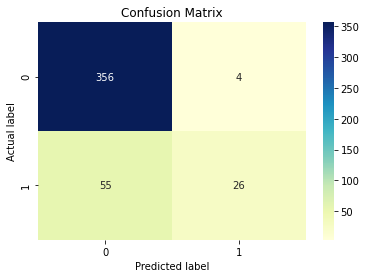

In [53]:
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(df_y_test, logReg_pred), annot=True, fmt='g', cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graph that compares the true positive rate against the false positive rate. It demonstrates the tradeoff between sensitivity and specificity. The sensitivity measures the goodness of accuracy of the model while specificity measures the weakness of the model.

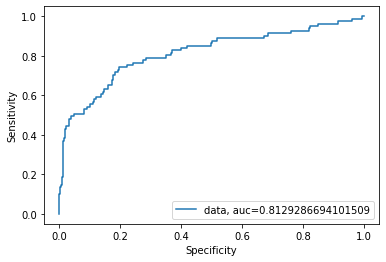

In [54]:
from sklearn import metrics
logReg_pred_proba = logReg.predict_proba(df_x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(df_y_test,  logReg_pred_proba)
auc = metrics.roc_auc_score(df_y_test, logReg_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.ylabel("Sensitivity")
plt.xlabel("Specificity")
plt.show()

The case has an AUC of 0.86. Our model can perfectly discriminate between 0 and 1. Hence, we can successfully conclude it is a well-fitted model. AUC score of 1 denotes a perfect classifier, whereas AUC score 0.5 denotes an worthless classifier.

From the above results, it can be seen that the model has low variance and higher bias. It will reduce the risk of inaccuarte predictions.

## Feature Importance Analysis

The term "feature importance" refers to a group of strategies for giving scores to input characteristics in a predictive model, indicating the relative significance of each item when producing a prediction.

The scores are valuable and may be applied in a variety of scenarios in a predictive modelling challenge, including:

- Improved data comprehension.
- Improved comprehension of a model.
- The number of input features is being reduced.

### Feature importance of our trained model (Logistic Regression)

In [56]:
# getting feature importance
fea_impo = logReg.coef_[0]

# summarizing feature importance
for i, j in enumerate(fea_impo):
    print('Feature: %0d, Score: %.5f' % (i, j))

Feature: 0, Score: -0.02647
Feature: 1, Score: -0.00205
Feature: 2, Score: -0.00037
Feature: 3, Score: 0.81915
Feature: 4, Score: 0.04290
Feature: 5, Score: 0.06417
Feature: 6, Score: 0.02419
Feature: 7, Score: 0.00004
Feature: 8, Score: -0.30429
Feature: 9, Score: 0.39981
Feature: 10, Score: 0.00130
Feature: 11, Score: -0.40084
Feature: 12, Score: -0.26022
Feature: 13, Score: -0.07594
Feature: 14, Score: -0.40412
Feature: 15, Score: 0.51450
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.20613
Feature: 18, Score: 1.86690
Feature: 19, Score: -0.02904
Feature: 20, Score: 0.59353
Feature: 21, Score: -0.20119
Feature: 22, Score: -0.27592
Feature: 23, Score: -0.07603
Feature: 24, Score: -0.12630
Feature: 25, Score: -0.23684
Feature: 26, Score: 0.01796
Feature: 27, Score: -0.13687
Feature: 28, Score: 0.20188
Feature: 29, Score: -0.03868


From the above visualization, we can see that features OverTime, MaritalStatus, Department, PerformanceRating, Gender, YearsSinceLastPromotion, NumCompaniesWorked, Education, EducationField, BusinessTravel, DistanceFromHome, YearsAtCompany are having impact on each prediction that is generated by classifier.

Note: A negative feature importance rating indicates that the characteristic increases the loss. This signifies that your model isn't making the best advantage of this feature.

### Saving the model

In [73]:
import pickle
with open("LogisticRegression_model", "wb") as f:
    pickle.dump(logReg, f)

# III. Discussion and Conclusion 

Using machine learning models to analysis employee attrition made a big impact in organisation, employ machine learning to forecast attrition reduce the cost of losing talents.

From the model comparison, it is clear that Logistic Regression Model is best suitable for this case with following metric scores:
- Accuracy: 86.84% (According to accuracy, we can state that our logistic regression model is a very well-fitted model. This model may be used to examine any employee attrition data collection.)
- Recall: 64% (ability to predict correctly all positives means employees with attrition)
- F1 score: 84%

### Strength <br>
By utilizing this dataset, the factors which affects the attrition rate and employees to leave the company is found. In future, the company can use this model to predict whether the employee will leave the company or not by providing the data to the trained classifier. <br>

### Limitations <br> 
The limitation of this solution is that the dataset used here is very small so it may not be useful for real enterprise applications. This model is a decent classifier for employee attritions, however it may result in false negatives, i.e. employees who attrited but were displayed as non-attrited. Companies can use the model as a guideline, but it only helps to a limited extent with employee turnover. Companies must spend time examining and addressing the major elements that lead to employee attrition based on these models in order to avoid losing talent.

### Implications <br>
Machine learning is one of the greatest technologies for avoiding attrition. Companies can uncover trends in their workers' behaviour that may suggest that they are about to depart or desire to be moved somewhere within the firm by employing algorithms and data.
This enables them to proactively prevent departures or nip prospective problems in the bud before they become full-fledged catastrophes. Some firms have even gone so far as to create whole departments dedicated to avoiding departures, or have enabled their HR professionals to better reduce attrition through the use of AI. <br>
Based on our observations, the following conclusions for businesses may be drawn: <br>
- Companies should limit overtime work for employees in order to boost job satisfaction.
- Employees with backgrounds in sales, research and development, and human resources must be cared for in accordance with their job functions.
- Companies should provide greater incentives for roles such as sales reps, laboratory technicians, and human resource managers. For example, they may reduce their work hours and provide some flexibility.

### Recommendations <br>
- Employees with backgrounds in research and development, human resources, and sales have a greater turnover rate than those with backgrounds in medical, life sciences, and other professions.
- In terms of job role, sales representatives account for about 40% of attrited staff, followed by laboratory technicians and human resources roles.
- When compared to employees who do not work overtime, 31% of overtime employees suffer attrition. Frequent business travel contributes to attrition as well.
- The data also reveals that the more invested a person is in their work, the less likely they are to leave the organisation.

# IV. References

1. Pavansubhash (2017). IBM HR Analytics Employee Attrition & Performance. [online] Kaggle.com. Available at: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.
2. HRM online. (2014). How to nip bad behaviour in the bud. [online] Available at: https://www.hrmonline.com.au/section/strategic-hr/nip-bad-behaviour-bud/ [Accessed 24 Mar. 2022].

‌

‌